# World Jigsaw Puzzle Championships 2023

## Individual results

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
file = "results/2023-World_individual-finals.csv"
df = pd.read_csv(file, index_col="Unnamed: 0")

finishers = df[df["From Previous"].notna()]

df.head()

,#,Country,Name,Location,Time,From Previous,From First
0,1,Spain,Alejandro Clemente León,Barcelona,00:37:59,-,-
1,2,Norway,Kristin Thuv,Bodø (Norge),00:38:32,+ 33'',at 33''
2,3,Czech Republic,Markéta Freislerová,Nupaky (Cze),00:42:34,+4' 02',at 4' 35''
3,4,USA,Andrea Peng,San Francisco (Ca),00:42:53,+ 19'',at 4' 54''
4,5,Hungary,Mercédesz Arthofer,Sopron (Győr-Moson-Sopron),00:42:59,+ 06',at 5' 00'


### Processing and type handling

In [61]:
def time_str_to_mins(x: str) -> float:
	x = x.split(":")
	t = (60 * int(x[0])) + int(x[1]) + (int(x[2]) / 60)

	return t

In [62]:
finishers["t"] = [time_str_to_mins(x) for x in finishers["Time"]]
finishers.head()

/tmp/ipykernel_96934/800664021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finishers["t"] = [time_str_to_mins(x) for x in finishers["Time"]]


,#,Country,Name,Location,Time,From Previous,From First,t
0,1,Spain,Alejandro Clemente León,Barcelona,00:37:59,-,-,37.983333
1,2,Norway,Kristin Thuv,Bodø (Norge),00:38:32,+ 33'',at 33'',38.533333
2,3,Czech Republic,Markéta Freislerová,Nupaky (Cze),00:42:34,+4' 02',at 4' 35'',42.566667
3,4,USA,Andrea Peng,San Francisco (Ca),00:42:53,+ 19'',at 4' 54'',42.883333
4,5,Hungary,Mercédesz Arthofer,Sopron (Győr-Moson-Sopron),00:42:59,+ 06',at 5' 00',42.983333


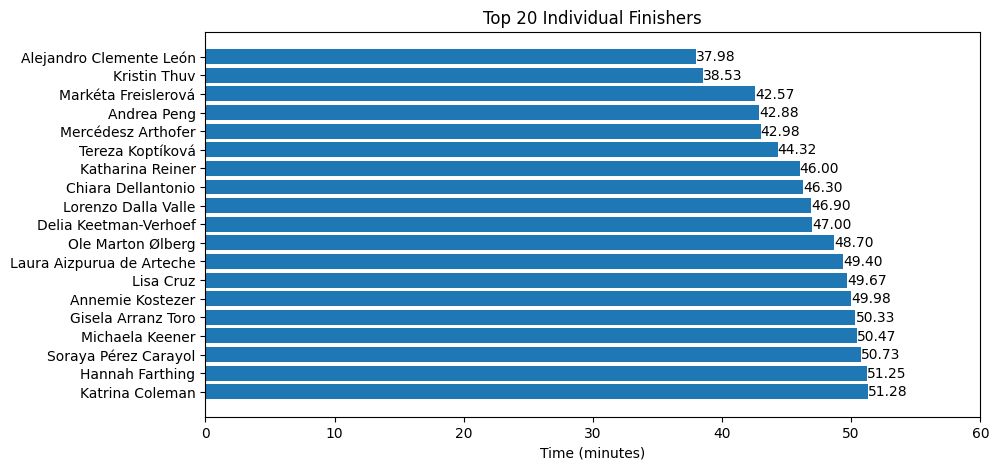

In [196]:
top_20 = finishers.loc[:19]
height, bars = top_20["t"], top_20["Name"]
y_pos = np.arange(len(bars), 0, -1)

plt.figure(figsize=(10,5))
p = plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.bar_label(p, fmt="%.2f")
plt.xlim(0, 60)
plt.title("Top 20 Individual Finishers")
plt.xlabel("Time (minutes)")
plt.show()

## Looking at the data by country

In [63]:
by_country = finishers.groupby("Country")
by_country.value_counts()

Country    #    Name                  Location                    Time       From Previous  From First   t        
Argentina  167  Lisa Marisel Joffrés  Godoy Cruz (Mendoza)        01:20:50   + 31''         at 42' 51''  80.833333    1
Australia  19   Hannah Farthing       Warragul (Vic)              00:51:15   + 31''         at 13' 16''  51.250000    1
           20   Katrina Coleman       Launceston (Tasmania)       00:51:17   + 02'          at 13' 18''  51.283333    1
           32   Melissa Townsend      Runaway Bay (Qld)           00:54:41   + 28''         at 16' 42''  54.683333    1
           84   Ellie Higgins         Melbourne (Victoria)        01:04:03   + 01'          at 26' 04'   64.050000    1
                                                                                                                     ..
USA        29   Jeanne Roiter         Duvall (Wa)                 00:53:51   + 51''         at 15' 52''  53.850000    1
           34   Dawne Rasmusson       Prior L

In [166]:
df_country = pd.DataFrame(columns=["Country", "#", "mean_time", "min_time", "max_time", "min", "max"])

for i, (country, df_temp) in enumerate(by_country):
	stats = df_temp.describe()

	# ["Country", "#", "Mean", 
	# "Min", "min_time", "Max", "max_time"]
	df_country.loc[i] = [country, len(df_temp), stats.loc["mean"]["t"],
					  stats.loc["min"]["t"], stats.loc["max"]["t"],
					  int(stats.loc["min"]["#"]), int(stats.loc["max"]["#"])]

df_country = df_country.sort_values(["#"], ascending=False)
df_country.head()

,Country,#,mean_time,min_time,max_time,min,max
34,USA,33,62.282828,42.883333,80.316667,4,166
30,Spain,25,62.992667,37.983333,80.283333,1,165
13,Germany,18,65.791667,46.000000,78.916667,7,162
31,Sweden,9,63.816667,54.216667,73.333333,31,142
8,Czech Republic,9,59.048148,42.566667,77.366667,3,159


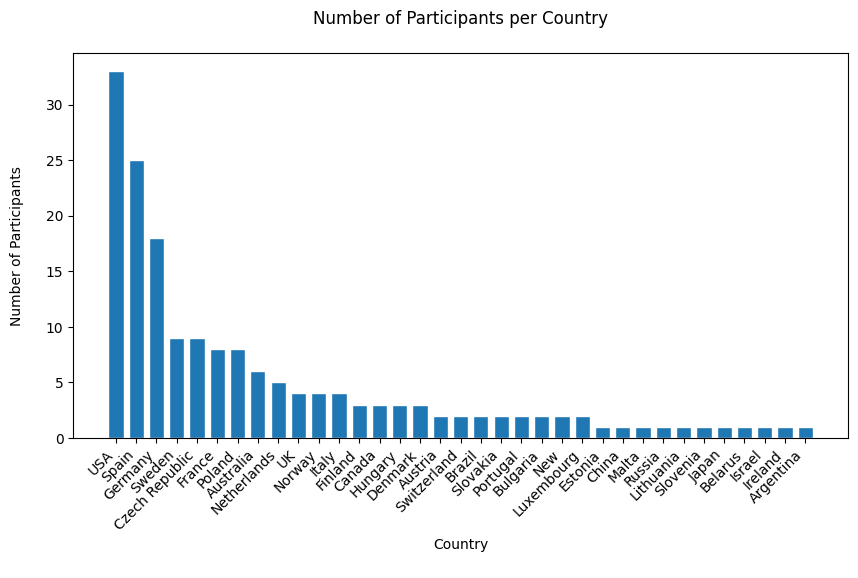

In [168]:
height = df_country["#"]
bars = df_country["Country"]
x_pos = np.arange(2 * len(df_country["Country"]), step=2)

plt.figure(figsize=(10,5))	
plt.bar(x_pos, df_country["#"], width=1.5, edgecolor="white")
plt.xlabel(xlabel="Country\n")
plt.ylabel(ylabel="Number of Participants\n")
plt.xticks(x_pos, bars, rotation=45, ha="right")
plt.title("Number of Participants per Country\n")
plt.show()
